### Import Libraries

In [1]:
# Import NumPy for numerical operations and array handling
import numpy as np
# Import Pandas for data manipulation and analysis
import pandas as pd
# Import Matplotlib's pyplot for creating static visualizations
import matplotlib.pyplot as plt
# Import Seaborn for enhanced statistical data visualization
import seaborn as sns

In [2]:
# Reading Datasets
# Load employee education data from CSV file
education_df=pd.read_csv("C:/Users/choud/Downloads/EducationLevel.csv")
# Load employee data from CSV file
employee_df=pd.read_csv("C:/Users/choud/Downloads/Employee.csv")
# Load performance rating data from CSV file
performance_rating_df=pd.read_csv("C:/Users/choud/Downloads/PerformanceRating.csv")
# Load rating level data from CSV file
rating_df=pd.read_csv("C:/Users/choud/Downloads/RatingLevel.csv")
# Load satisfaction level data from CSV file
satisfied_df=pd.read_csv("C:/Users/choud/Downloads/SatisfiedLevel.csv")

### Data Overview

In [3]:
# Display the first few rows of each dataframe to understand their structure
# Show education level data
print("\n--- Education Level  ---")
display(education_df.head())

# Show employee demographic data
print("\n--- Employee Data ---")
display(employee_df.head())

# Show performance rating data
print("\n--- Performance Rating Level --- ")
display(performance_rating_df.head())

# Show rating level descriptions
print("\n--- Rating Level ---")
display(rating_df.head())

# Show employee satisfaction data
print('\n--- Satisfaction Level---')
display(satisfied_df.head())


--- Education Level  ---


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate



--- Employee Data ---


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6



--- Performance Rating Level --- 


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3



--- Rating Level ---


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond



--- Satisfaction Level---


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [4]:
# Merging Employee Table With Performance Rating Level Table
hr_df=pd.merge(employee_df, performance_rating_df, on="EmployeeID", how="inner")
hr_df=hr_df.drop_duplicates(subset='EmployeeID', keep='first')

In [5]:
# Check the dimensions of the hr_df DataFrame
# Returns a tuple with (number of rows, number of columns)
hr_df.shape

(1280, 33)

### Data Cleaning And Understanding

In [7]:
# Info Overview
print("\n--- Dataset Info---")
hr_df.info()


--- Dataset Info---
<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 0 to 6700
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   EmployeeID                       1280 non-null   object
 1   FirstName                        1280 non-null   object
 2   LastName                         1280 non-null   object
 3   Gender                           1280 non-null   object
 4   Age                              1280 non-null   int64 
 5   BusinessTravel                   1280 non-null   object
 6   Department                       1280 non-null   object
 7   DistanceFromHome (KM)            1280 non-null   int64 
 8   State                            1280 non-null   object
 9   Ethnicity                        1280 non-null   object
 10  Education                        1280 non-null   int64 
 11  EducationField                   1280 non-null   object
 12  JobRole           

In [8]:
# Numeric Summary
print("\n---- Numeric Columns Summary ----")
hr_df.describe()


---- Numeric Columns Summary ----


,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,29.654688,22.390625,2.887500,114118.309375,0.785937,5.192969,2.608594,3.914062,2.548437,3.879688,3.439844,3.410156,2.025000,1.034375,3.442969,3.984375,3.457813
std,7.831462,12.784210,1.025782,103231.510213,0.849664,3.050953,2.571709,2.863666,2.540216,0.972440,1.166166,1.144613,0.807122,0.955821,1.152160,0.823657,0.966896
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,24.000000,12.000000,2.000000,44633.500000,0.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,27.000000,22.000000,3.000000,73648.000000,1.000000,5.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,35.000000,33.000000,4.000000,142579.250000,1.000000,8.000000,4.000000,6.000000,4.000000,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [9]:
# Missing Values
print("\n---- Null Values ----")
hr_df.isnull().sum()


---- Null Values ----


EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
DistanceFromHome (KM)              0
State                              0
Ethnicity                          0
Education                          0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
StockOptionLevel                   0
OverTime                           0
HireDate                           0
Attrition                          0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
R

In [10]:
# Duplicates Values
print("\n---- Duplicate Rows ----")
hr_df.duplicated().sum()


---- Duplicate Rows ----


np.int64(0)

In [11]:
# Display the first 5 rows of the hr_df DataFrame
hr_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,10/30/2016,3,3,2,3,0,4,3,3
9,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,PR1213,7/30/2016,3,3,2,2,0,5,4,4
18,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,PR1035,4/8/2016,3,3,2,1,0,2,3,2
27,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,PR1016,3/27/2016,3,5,3,3,0,2,3,3
36,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,PR1107,5/13/2016,4,3,2,1,0,5,3,2


### EDA Overview

In [12]:
# Set Visualization Style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"]=(8,5)

In [13]:
# Check Numerical Columns And Categorical Columns
numeric_cols=hr_df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols=hr_df.select_dtypes(include="object").columns.tolist()

In [14]:
print("\n--- Numeric Columns ---",numeric_cols)
print("\n--- Categorical Columns ---",categorical_cols)


--- Numeric Columns --- ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating', 'ManagerRating']

--- Categorical Columns --- ['EmployeeID', 'FirstName', 'LastName', 'Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'HireDate', 'Attrition', 'PerformanceID', 'ReviewDate']


### Employee Deographics Overview


C:\Users\choud\AppData\Local\Temp\ipykernel_23400\502528899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=hr_df, x="Gender", palette="cool")


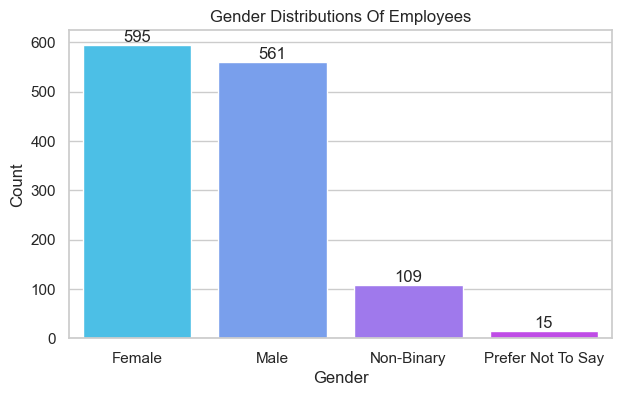

In [15]:
# Gender Distribution 
plt.figure(figsize=(7,4))
ax=sns.countplot(data=hr_df, x="Gender", palette="cool")
plt.title("Gender Distributions Of Employees")
plt.xlabel("Gender")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
plt.show()

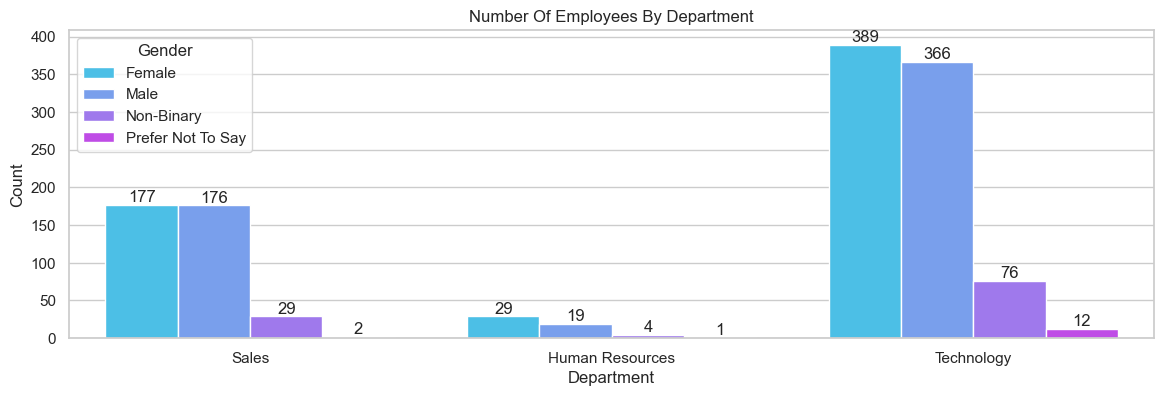

In [16]:
# Department Wise Count
plt.figure(figsize=(14,4))
ax=sns.countplot(data=hr_df, x="Department",hue="Gender", palette="cool")
plt.title("Number Of Employees By Department")
plt.xlabel("Department")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
plt.show()

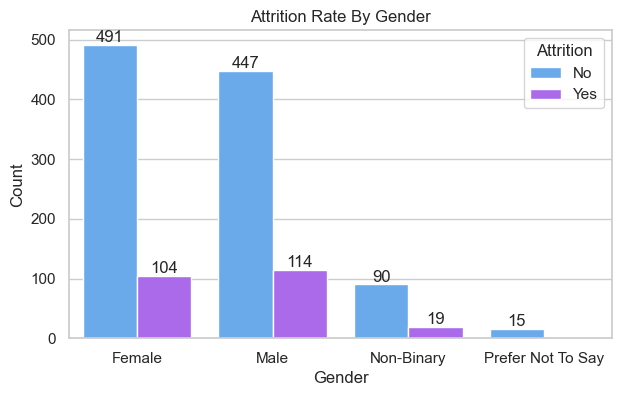

In [17]:
# Attrition Rate By Gender
plt.figure(figsize=(7,4))
ax=sns.countplot(data=hr_df, x="Gender",hue="Attrition", palette="cool")
plt.title("Attrition Rate By Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
plt.show()

### Performance And Satisfaction Analysis

C:\Users\choud\AppData\Local\Temp\ipykernel_23400\4113604135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=hr_df, x="Department", y="JobSatisfaction", palette="cool", errorbar=None)


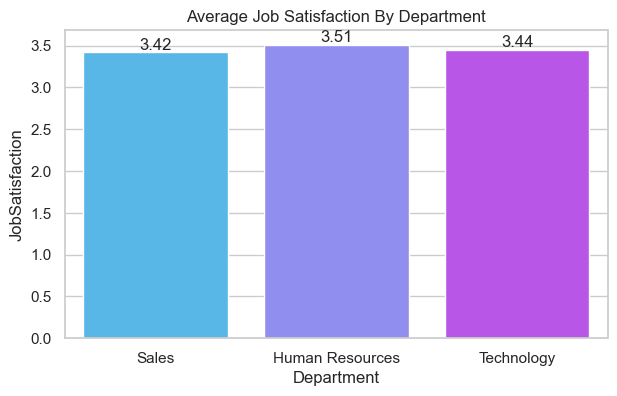

In [18]:
# Average Job Satisfaction By Department
plt.figure(figsize=(7,4))
ax=sns.barplot(data=hr_df, x="Department", y="JobSatisfaction", palette="cool", errorbar=None)
plt.title("Average Job Satisfaction By Department")
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f",label_type="edge")
plt.show()

C:\Users\choud\AppData\Local\Temp\ipykernel_23400\2073622311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_df, x="Attrition", y="WorkLifeBalance", palette="cool")


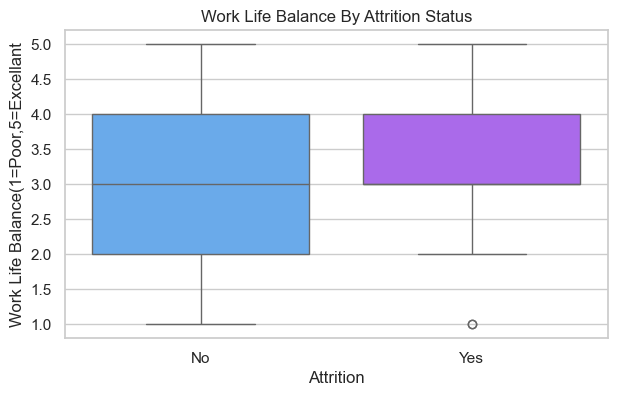

In [19]:
# Work Life Balance Vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(data=hr_df, x="Attrition", y="WorkLifeBalance", palette="cool")
plt.title("Work Life Balance By Attrition Status")
plt.ylabel("Work Life Balance(1=Poor,5=Excellant")
plt.show()

In [20]:
# Average Attrition Rate By Work Life Balance
hr_df.groupby('Attrition')['WorkLifeBalance'].mean()

Attrition
No     3.436242
Yes    3.472574
Name: WorkLifeBalance, dtype: float64

C:\Users\choud\AppData\Local\Temp\ipykernel_23400\51522260.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=hr_df,x="SelfRating",y="ManagerRating",palette="cool")
C:\Users\choud\AppData\Local\Temp\ipykernel_23400\51522260.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")


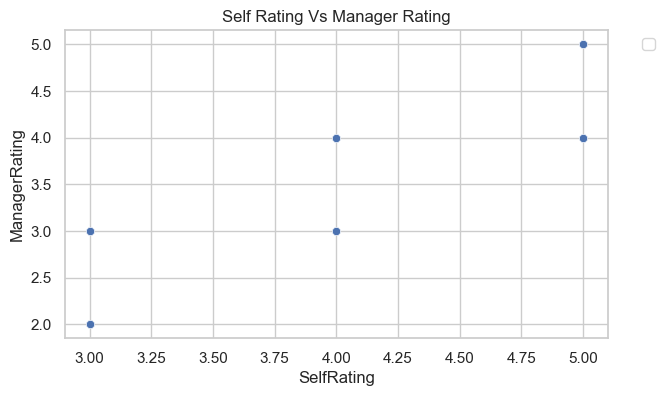

In [21]:
# Self Rating Vs Manager Rating
plt.figure(figsize=(7,4))
sns.scatterplot(data=hr_df,x="SelfRating",y="ManagerRating",palette="cool")
plt.title("Self Rating Vs Manager Rating")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

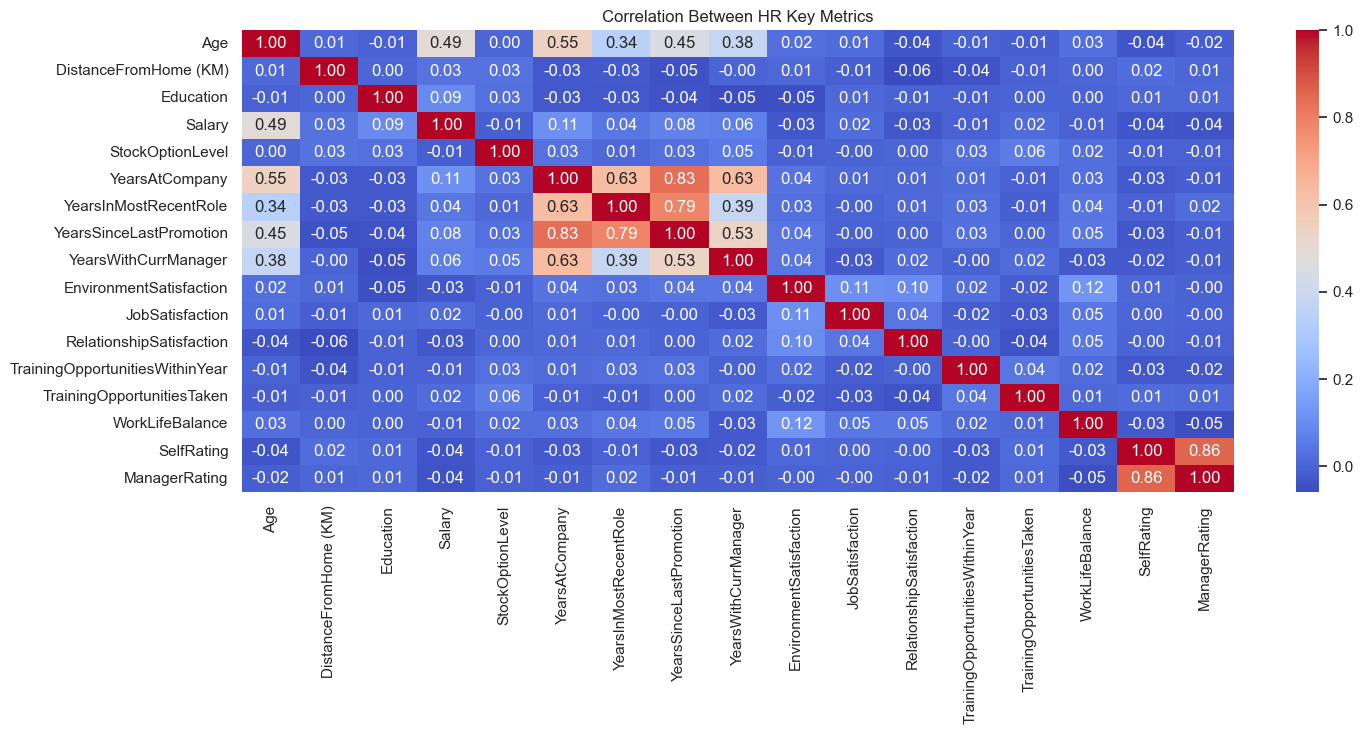

In [22]:
# Correlation Heatmap For Key Numeric Features
# Create a figure with specified size
plt.figure(figsize=(16,6))
corr_cols=['Age','DistanceFromHome (KM)','Education',
'Salary','StockOptionLevel','YearsAtCompany','YearsInMostRecentRole','YearsSinceLastPromotion',
'YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction',
'TrainingOpportunitiesWithinYear','TrainingOpportunitiesTaken','WorkLifeBalance','SelfRating','ManagerRating']
# Generate correlation matrix and visualize as heatmap
sns.heatmap(hr_df[corr_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
# Add descriptive title to the plot
plt.title("Correlation Between HR Key Metrics")
# Display the heatmap
plt.show()

### Categorical Variable Analysis

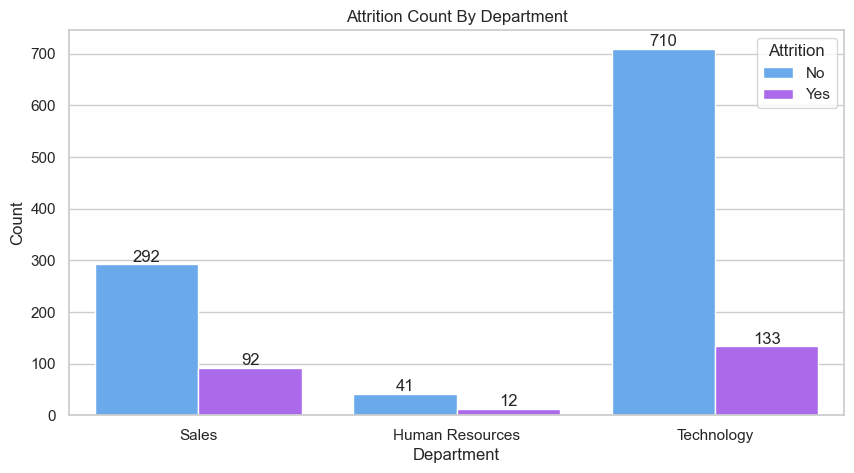

In [23]:
# Attrition Count By Department
# Create a figure with specified size
plt.figure(figsize=(10,5))
# Create a countplot showing attrition distribution across departments
# hue parameter colors the bars based on attrition status
ax=sns.countplot(data=hr_df,x="Department",hue="Attrition",palette="cool")
# Add a title and axis labels to the plot
plt.title("Attrition Count By Department")
plt.xlabel("Department")
plt.ylabel("Count")
# Add count labels to the top of each bar
for container in ax.containers:
    ax.bar_label(container,label_type="edge")
# Display the plot   
plt.show()

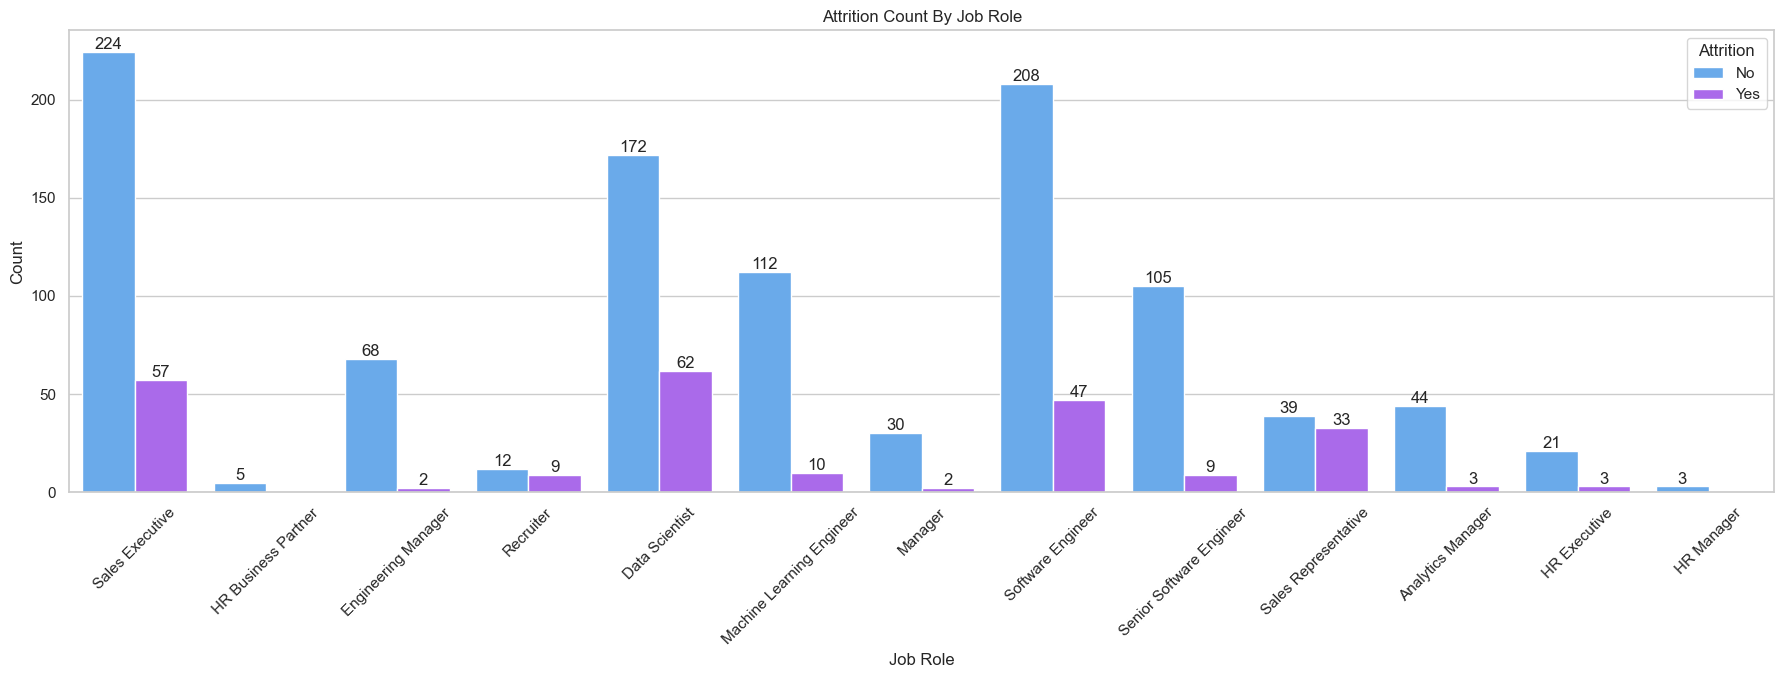

In [24]:
# Attrition Count By Job Role
plt.figure(figsize=(22,6))
ax=sns.countplot(data=hr_df,x="JobRole",hue="Attrition",palette="cool")
plt.title("Attrition Count By Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container,label_type="edge")
plt.show()

C:\Users\choud\AppData\Local\Temp\ipykernel_23400\1120787528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_df,x="Attrition",y="Salary",palette="cool")


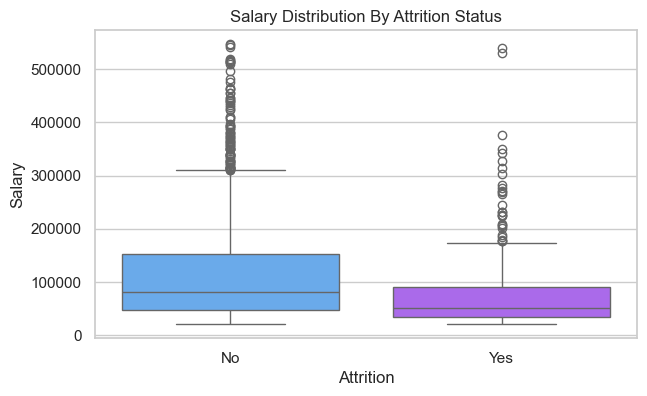

In [25]:
# Attrition Count By Salary
plt.figure(figsize=(7,4))
sns.boxplot(data=hr_df,x="Attrition",y="Salary",palette="cool")
plt.title("Salary Distribution By Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Salary")
plt.show()

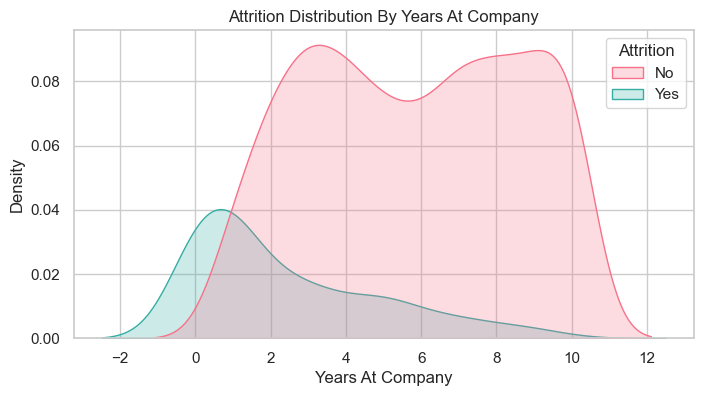

In [26]:
# Attrition By Experience Level
plt.figure(figsize=(8,4))
sns.kdeplot(data=hr_df,x="YearsAtCompany",hue="Attrition",fill=True,palette="husl")
plt.title("Attrition Distribution By Years At Company")
plt.xlabel("Years At Company")
plt.ylabel("Density")
plt.show()

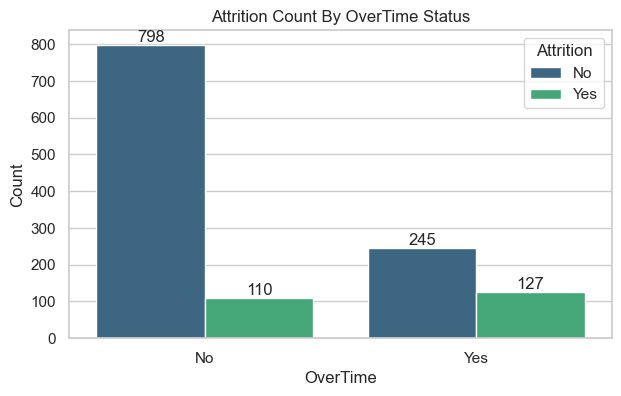

In [27]:
# Attrition By Overtime
plt.figure(figsize=(7,4))
ax=sns.countplot(data=hr_df,x="OverTime",hue="Attrition",palette="viridis")
plt.title("Attrition Count By OverTime Status")
plt.xlabel("OverTime")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container,label_type="edge")
plt.show()

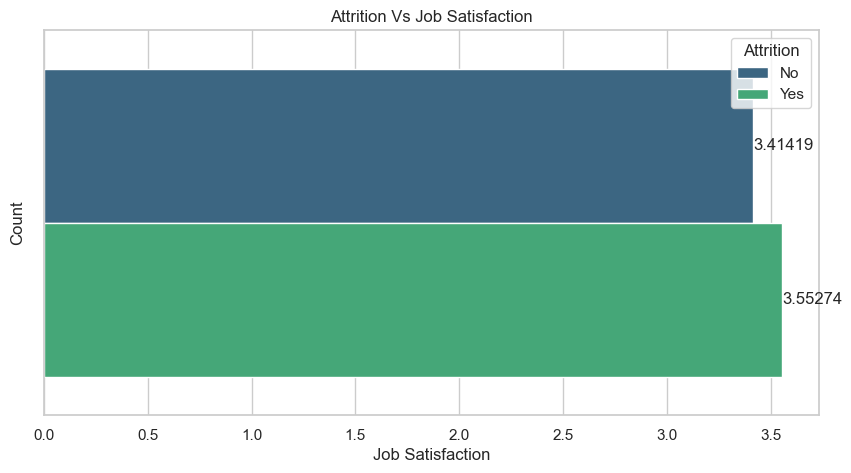

In [28]:
# Attrition Count By Job Satisfaction
plt.figure(figsize=(10,5))
ax=sns.barplot(data=hr_df,x="JobSatisfaction",hue="Attrition",palette="viridis",errorbar=None)
plt.title("Attrition Vs Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container,label_type="edge")
plt.show()

## Summary of Key Findings - HR Employee Performance & Attrition Analysis

## Conclusion